# Iris Flower Classfication

Importing Dependencies

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

Loading Dataset

In [28]:
Dataset = pd.read_csv('Iris.csv')

In [29]:
Dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Pre-Processing

Dropping 'Id' attribute

In [31]:
Dataset = Dataset.drop(labels='Id', axis=1)

In [32]:
Dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
Dataset['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [34]:
Dataset['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

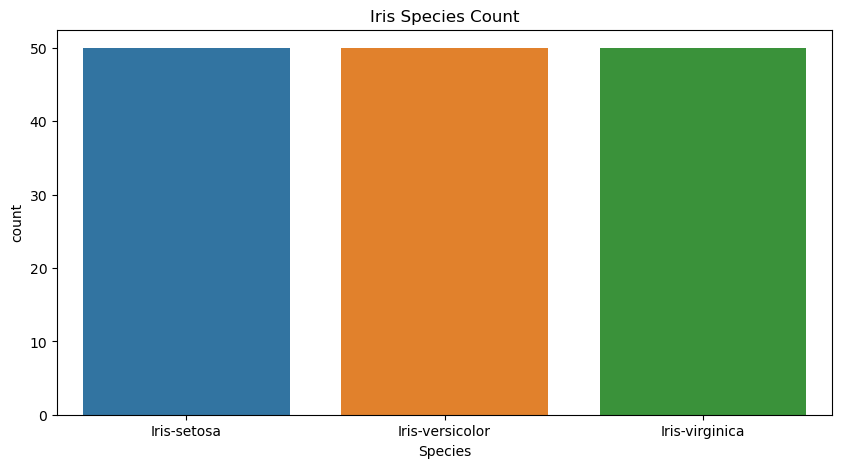

In [35]:
ax = plt.subplots(1, 1, figsize=(10,5))
sns.countplot(x=Dataset['Species'])
plt.title("Iris Species Count")
plt.show()

# Data Exploration

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

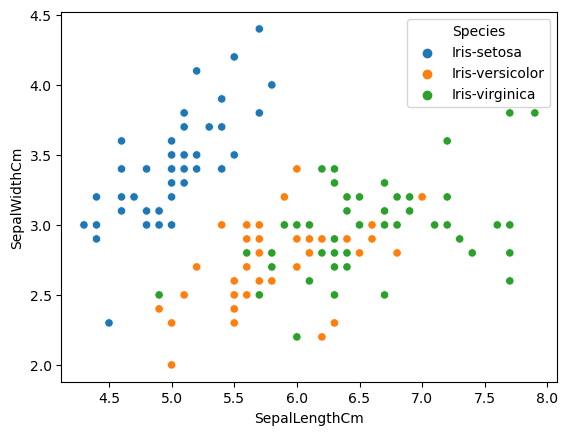

In [36]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=Dataset)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

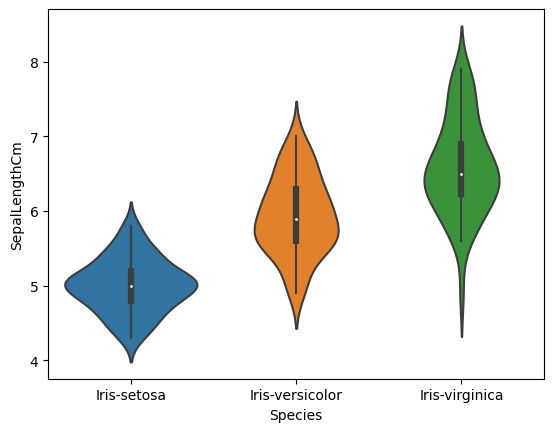

In [37]:
sns.violinplot(data=Dataset, x='Species', y='SepalLengthCm')

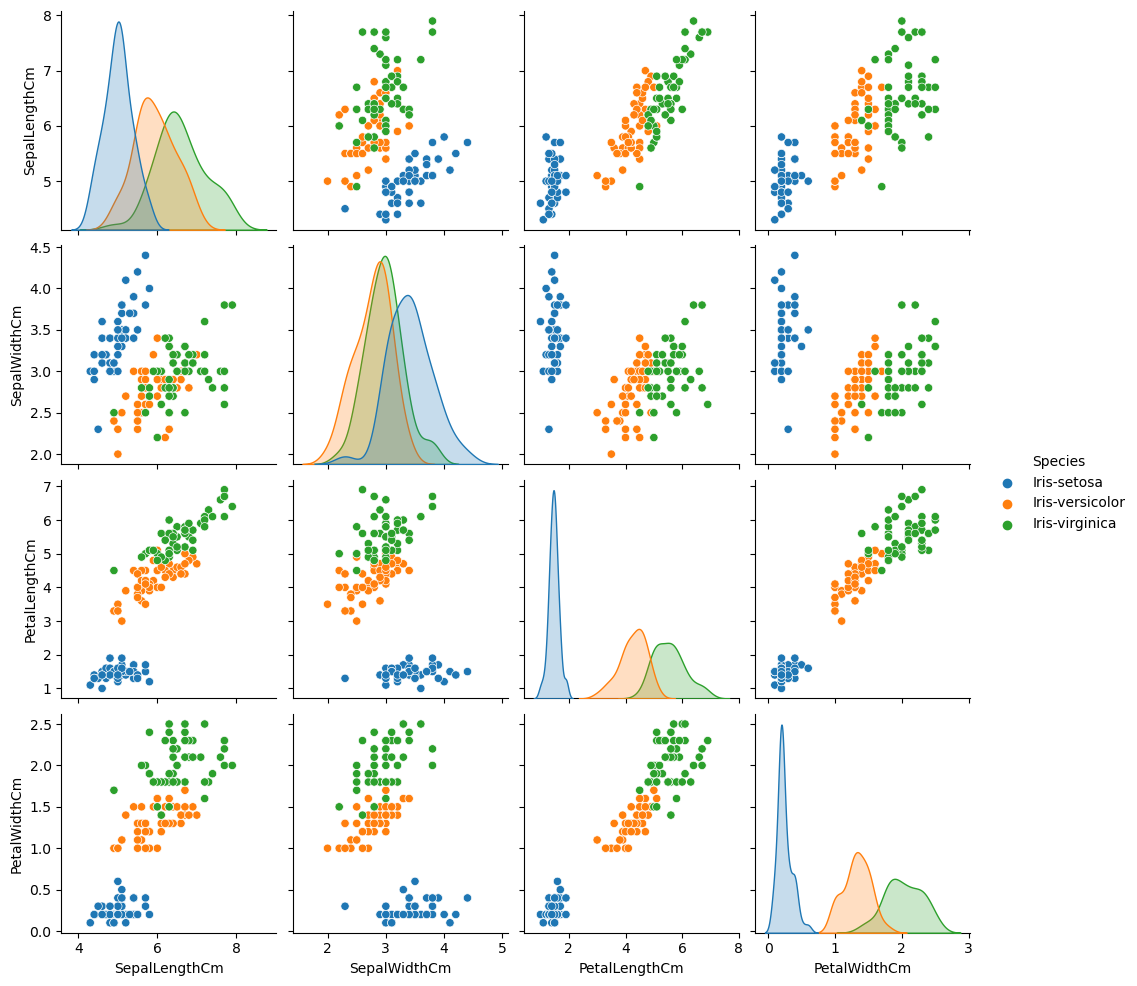

In [38]:
sns.pairplot(Dataset, hue='Species')

In [39]:
print(Dataset.corr)

<bound method DataFrame.corr of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>


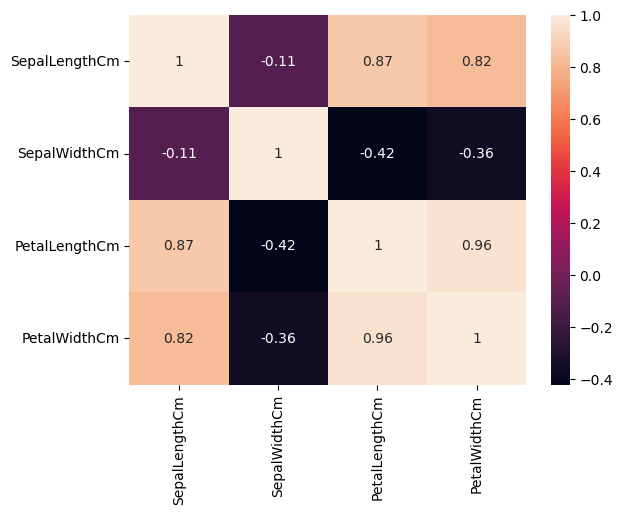

In [40]:
sns.heatmap(Dataset.corr(numeric_only = True), annot=True)
plt.show()

<Axes: xlabel='SepalWidthCm'>

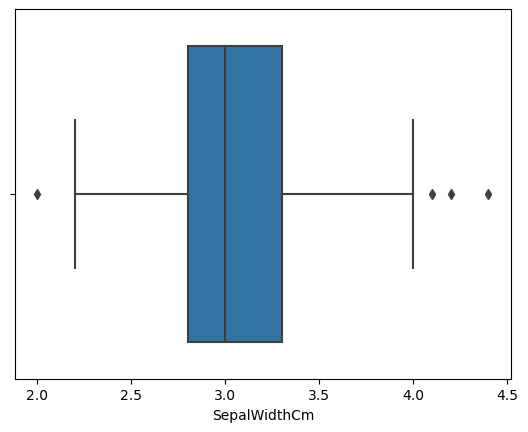

In [41]:
sns.boxplot(x='SepalWidthCm', data=Dataset)

Seperating Features and Target variable

In [42]:
Datanew  = Dataset.values
X = Datanew[:,0:4]
Y = Datanew[:,4]

In [43]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [44]:
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [45]:
X.shape

(150, 4)

In [46]:
Y.shape

(150,)

Using Train Test Split

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [48]:
X_train

array([[5.5, 2.4, 3.7, 1.0],
       [5.7, 2.8, 4.1, 1.3],
       [6.0, 2.2, 5.0, 1.5],
       [4.8, 3.0, 1.4, 0.1],
       [5.4, 3.9, 1.3, 0.4],
       [6.4, 3.2, 4.5, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [5.5, 2.5, 4.0, 1.3],
       [6.3, 3.4, 5.6, 2.4],
       [5.8, 2.8, 5.1, 2.4],
       [4.5, 2.3, 1.3, 0.3],
       [5.5, 2.6, 4.4, 1.2],
       [7.1, 3.0, 5.9, 2.1],
       [7.2, 3.6, 6.1, 2.5],
       [4.9, 3.1, 1.5, 0.1],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.0, 1.6, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [5.8, 2.6, 4.0, 1.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.3, 1.7, 0.5],
       [5.0, 3.2, 1.2, 0.2],
       [6.5, 2.8, 4.6, 1.5],
       [7.9, 3.8, 6.4, 2.0],
       [6.1, 3.0, 4.9, 1.8],
       [5.4, 3.0, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 2.9, 4.2, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.5, 3.2, 5.1, 2.0],
       [5.8, 2.7, 3.9, 1.2],
       [4.6, 3.6, 1.0, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2

In [49]:
X_test

array([[6.4, 2.8, 5.6, 2.1],
       [4.8, 3.4, 1.6, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [5.7, 4.4, 1.5, 0.4],
       [6.3, 2.7, 4.9, 1.8],
       [7.7, 3.0, 6.1, 2.3],
       [5.2, 4.1, 1.5, 0.1],
       [4.9, 3.0, 1.4, 0.2],
       [6.5, 3.0, 5.5, 1.8],
       [4.8, 3.0, 1.4, 0.3],
       [5.0, 3.5, 1.3, 0.3],
       [6.4, 3.2, 5.3, 2.3],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.7, 3.0, 5.2, 2.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.0, 2.2, 4.0, 1.0],
       [6.7, 3.0, 5.0, 1.7],
       [7.7, 2.8, 6.7, 2.0],
       [6.8, 3.0, 5.5, 2.1],
       [7.2, 3.2, 6.0, 1.8],
       [5.4, 3.4, 1.5, 0.4],
       [6.3, 2.5, 5.0, 1.9],
       [4.7, 3.2, 1.6, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.0, 5.1, 1.8],
       [6.6, 3.0, 4.4, 1.4],
       [5.4, 3.4, 1.7, 0.2],
       [6.1, 2.8, 4.7, 1.2],
       [6.9, 3.2, 5.7, 2.3]], dtype=object)

In [50]:
Y_train

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virgin

In [51]:
Y_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Model 1 -Logistic Regression

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
model_lr = LogisticRegression()

In [65]:
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [66]:
prediction = model_lr.predict(X_test)

In [69]:
print(classification_report(Y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



Printing accuracy score

In [70]:
print(accuracy_score(Y_test, prediction))

0.9666666666666667


Printing Actual value against Predicted value

In [71]:
for i in range(len(prediction)):
    print(Y_test[i], prediction[i])

Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica


# Model 2 - Support Vector Classifier

In [52]:
model_svc = SVC()
model_svc.fit(X_train, Y_train)

SVC()

In [53]:
prediction1 = model_svc.predict(X_test)

Printing Accuracy Score

In [56]:
print(accuracy_score(Y_test, prediction1))

1.0


Printing Actual value against Predicted value

In [55]:
for i in range(len(prediction1)):
    print(Y_test[i], prediction1[i])

Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica


# Model 3 - KNN algorithm

In [73]:
model_knn = KNeighborsClassifier()

In [74]:
model_knn.fit(X_test, Y_test)

KNeighborsClassifier()

In [77]:
prediction2 = model_knn.predict(X_test)

Printing Accuracy Score

In [76]:
print(model_knn.score(X_test, Y_test))

0.9666666666666667


Printing Actual value against Predicted value

In [78]:
for i in range(len(prediction2)):
    print(Y_test[i], prediction2[i])

Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
